<a href="https://colab.research.google.com/github/vaibhavekshinge/IPL-Data-Analysis/blob/main/IPL_dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [ ]:
data = pd.read_excel("IPLData 2.xlsx")

In [ ]:
data.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


In [ ]:
data.isna().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

Cleaning the data

In [ ]:
batters = data.loc[(data["Player_Type"] == "Batter")]

batters_new = batters.loc[(batters["Capped"] == 1)]

Capped_Batters = batters_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Runs',
                              'Average',
                              'Strike_Rate']]

In [ ]:
Capped_Batters.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
4,Shimron Hetmyer,Rajasthan,Overseas,31.0,517.0,25.85,151.17


In [ ]:
Bowlers = data.loc[(data["Player_Type"] == "Bowler")]

Bowlers_new = Bowlers.loc[(Bowlers["Capped"] == 1)]

Capped_Bowlers = Bowlers_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Wickets',
                              'Bowling_average',
                              'Economy',
                              'Bowling_Strike_Rate']]

In [ ]:
Capped_Bowlers.head()

In [ ]:
Keepers = data.loc[(data["Player_Type"] == "Keeper")]

Keepers_new = Keepers.loc[(Keepers["Capped"] == 1)]

Capped_Keepers = Keepers_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Runs',
                              'Average',
                              'Strike_Rate',
                              'Catches',
                              'Run_outs',
                              'Stumps']]

In [ ]:
Capped_Keepers.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.3,130.9,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.4,127.5,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.5,136.3,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.5,142.2,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.8,129.7,123.0,14.0,32.0


In [ ]:
Allrounders = data.loc[(data["Player_Type"] == "Allrounder")]

Allrounders_new = Allrounders.loc[(Allrounders["Capped"] == 1)]

Capped_Allrounders = Allrounders_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Runs',
                              'Average',
                              'Strike_Rate',
                              'Wickets',
                              'Bowling_average',
                              'Economy',
                              'Bowling_Strike_Rate']]

In [ ]:
Capped_Allrounders.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,167.0,456.0,11.12,109.88,145.0,27.80,6.91,24.12
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
129,Dwayne Bravo,Chennai,Overseas,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44
130,Nitish Rana,Kolkata,Indian,77.0,1820.0,28.00,132.46,7.0,22.00,8.03,16.43
131,Jason Holder,Lucknow,Overseas,26.0,189.0,14.54,121.15,35.0,22.46,8.20,16.43


In [ ]:
Capped_Batters = Capped_Batters.fillna(0)
Capped_Bowlers = Capped_Bowlers.fillna(0)
Capped_Allrounders = Capped_Allrounders.fillna(0)
Capped_Keepers = Capped_Keepers.fillna(0)

In [ ]:
#checking null values in data
print(Capped_Batters.isna().sum())
print(Capped_Bowlers.isna().sum())
print(Capped_Allrounders.isna().sum())
print(Capped_Keepers.isna().sum())

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64
Player Name            0.0
Team                   0.0
Nationality            0.0
Matches_Played         0.0
Wickets                0.0
Bowling_average        0.0
Economy                0.0
Bowling_Strike_Rate    0.0
dtype: float64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           0
Run_outs          0
Stumps            0
dtype: int64


Initial Analysis

In [ ]:
top_batters = Capped_Batters.loc[(Capped_Batters["Average"] >= 32.0)]

top_batters_average = top_batters.sort_values('Average', ascending=False)
top_batters_strike_rate = top_batters.sort_values('Strike_Rate', ascending=False)
top_batters_runs = top_batters.sort_values('Runs', ascending=False)
top_batters_matches = top_batters.sort_values('Matches_Played', ascending=False)

In [ ]:
top_batters_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51


In [ ]:
top_batters_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60


In [ ]:
top_batters_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [ ]:
top_batters_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


Top 3 players from above data


1.   David Warner
2.   KL Rahul
3.   Virat Kholi



In [ ]:
top_bowlers = Capped_Bowlers.loc[(Capped_Bowlers["Bowling_average"] <= 24.0)]

top_bowlers_average = top_bowlers.sort_values('Bowling_average')
top_bowlers_strike_rate = top_bowlers.sort_values('Bowling_Strike_Rate')
top_bowlers_wickets = top_bowlers.sort_values('Wickets', ascending=False)
top_bowlers_economy = top_bowlers.sort_values('Economy')
top_bowlers_matches = top_bowlers.sort_values('Matches_Played')

In [ ]:
top_bowlers_average

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate


In [ ]:
top_bowlers_strike_rate

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate


In [ ]:
top_bowlers_wickets

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate


In [ ]:
top_bowlers_economy

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate


In [ ]:
top_bowlers_matches

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate


In [ ]:
top_allrounders = Capped_Allrounders.loc[(Capped_Allrounders["Strike_Rate"] >= 140.0)]

top_allrounders_average = top_allrounders.sort_values('Average', ascending=False)
top_allrounders_strike_rate = top_allrounders.sort_values('Strike_Rate', ascending=False)
top_allrounders_runs = top_allrounders.sort_values('Runs', ascending=False)
top_allrounders_matches = top_allrounders.sort_values('Matches_Played', ascending=False)
top_allrounders_bowling_average = top_allrounders.sort_values('Bowling_average')
top_allrounders_bowling_strike_rate = top_allrounders.sort_values('Bowling_Strike_Rate')
top_allrounders_wickets = top_allrounders.sort_values('Wickets', ascending=False)
top_allrounders_economy = top_allrounders.sort_values('Economy')
top_allrounders_matches = top_allrounders.sort_values('Matches_Played', ascending=False)

In [ ]:
top_allrounders_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38


In [ ]:
top_allrounders_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69


In [ ]:
top_allrounders_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [ ]:
top_allrounders_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [ ]:
top_allrounders_bowling_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18


In [ ]:
top_allrounders_bowling_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18


In [ ]:
top_allrounders_wickets

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [ ]:
top_allrounders_economy

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51


Top All rounders


1.   Andre Russell
2.   Sunil Narine
3.   Hardik Pandya
4.   Jofra Archer



In [ ]:
top_keepers = Capped_Keepers.loc[(Capped_Keepers["Average"] >= 25)]

top_keepers_average = top_keepers.sort_values('Average', ascending=False)
top_keepers_strike_rate = top_keepers.sort_values('Strike_Rate', ascending=False)
top_keepers_runs = top_keepers.sort_values('Runs', ascending=False)
top_keepers_matches = top_keepers.sort_values('Matches_Played', ascending=False)
top_keepers_catches = top_keepers.sort_values('Catches', ascending=False)
top_keepers_runouts = top_keepers.sort_values('Run_outs', ascending=False)
top_keepers_stumps = top_keepers.sort_values('Stumps', ascending=False)

In [ ]:
top_keepers_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0


In [ ]:
top_keepers_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [ ]:
top_keepers_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [ ]:
top_keepers_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [ ]:
top_keepers_catches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [ ]:
top_keepers_runouts

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [ ]:
top_keepers_stumps

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0


Top 3 Keepers


1.   MS Dhoni
2.   Dinesh Kartik
3.   Rishab Pant



Visualization For Enhanced Analysis

Batters Data

<Axes: xlabel='Player Name', ylabel='Strike_Rate'>

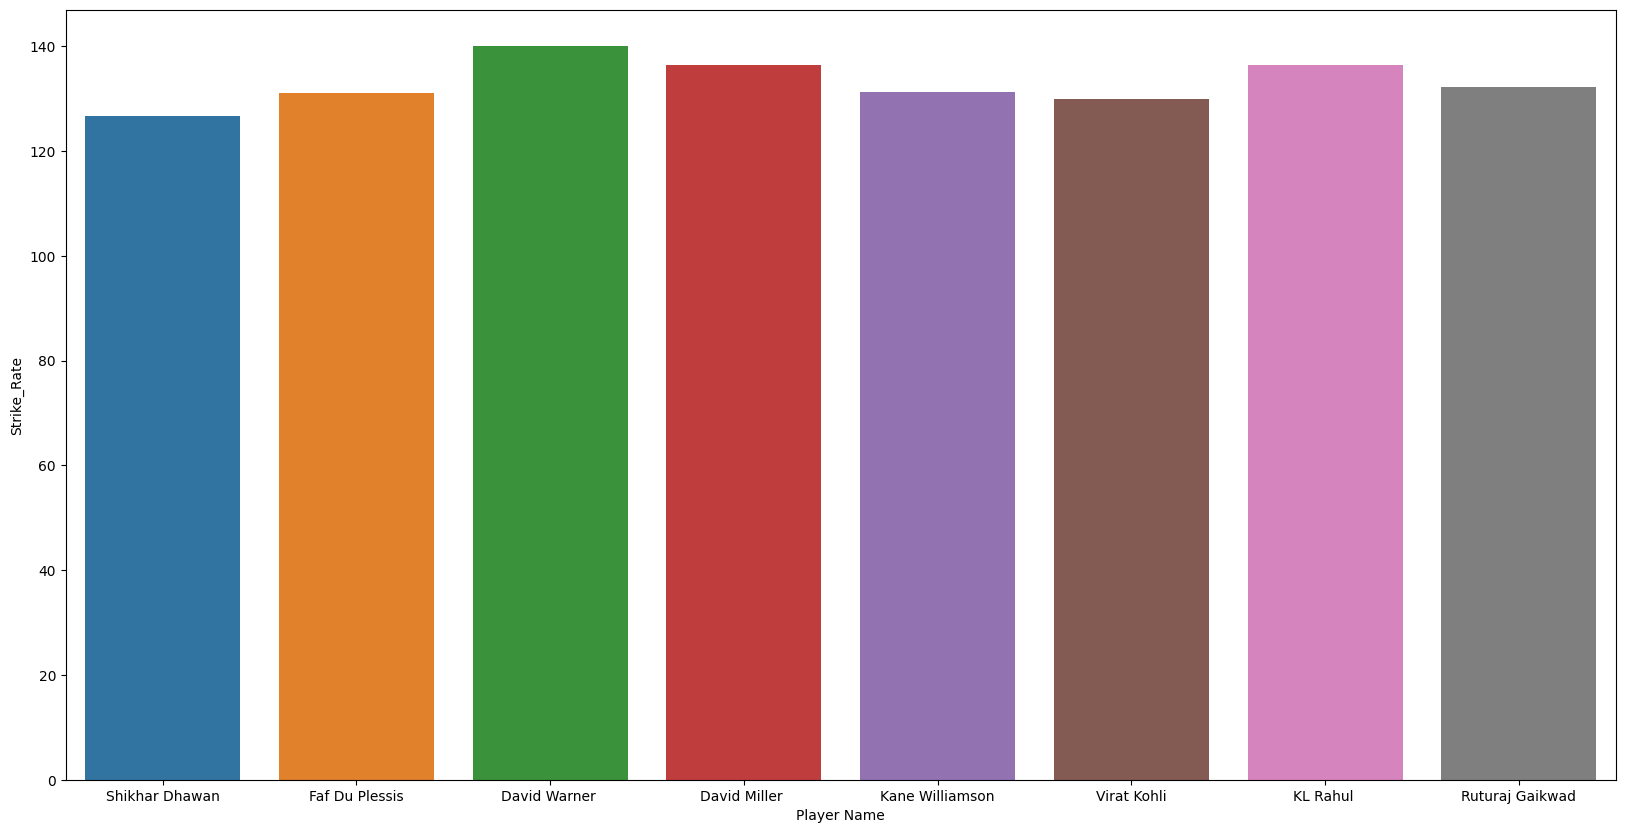

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Strike_Rate', data=top_batters)

<Axes: xlabel='Player Name', ylabel='Runs'>

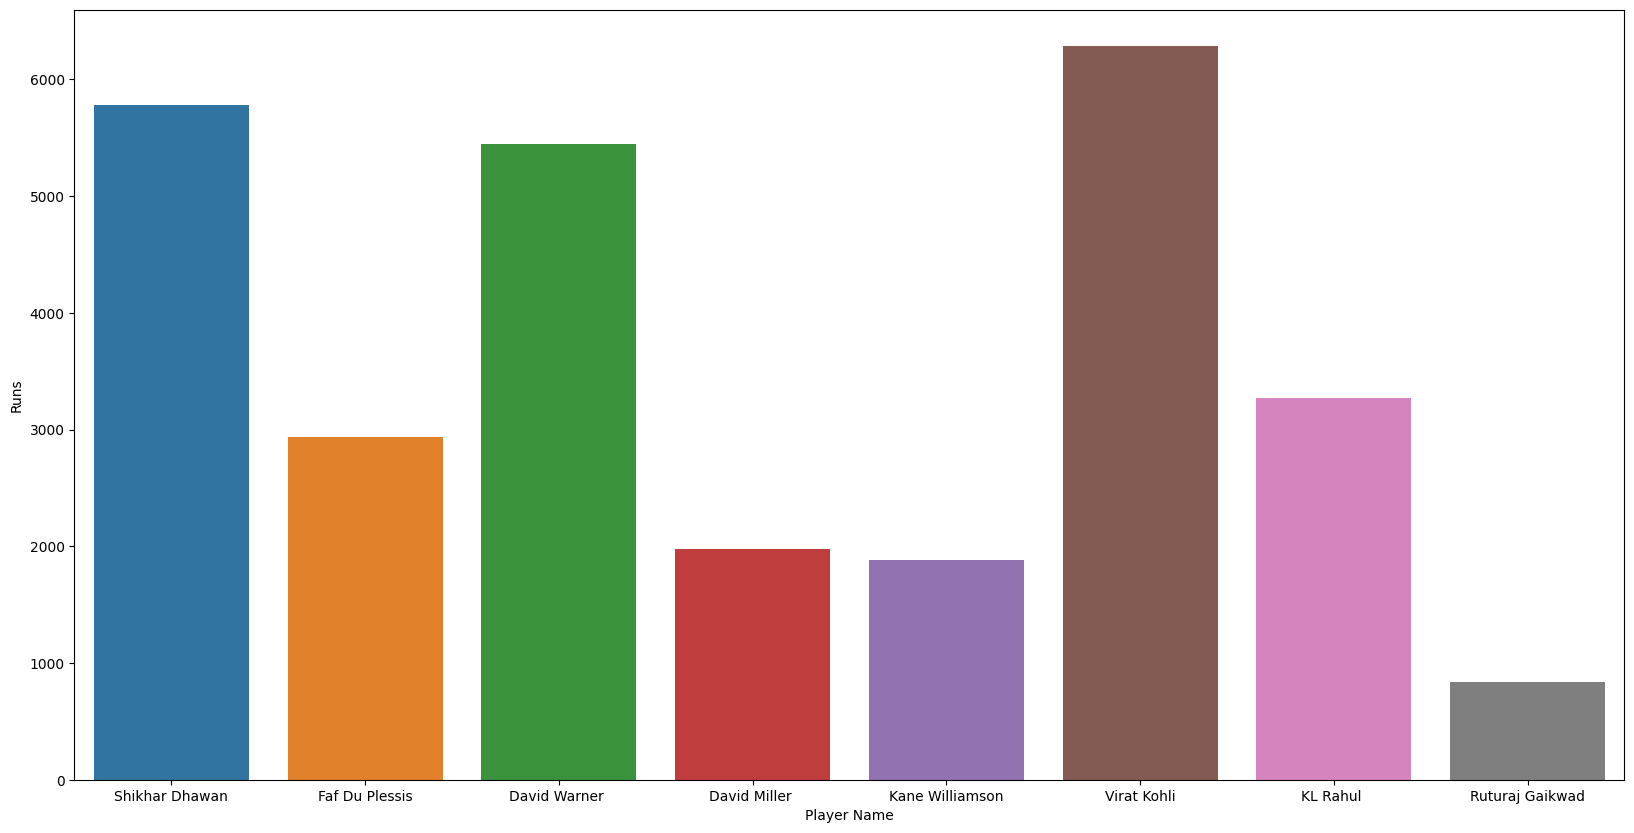

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Runs', data=top_batters)

<Axes: xlabel='Player Name', ylabel='Average'>

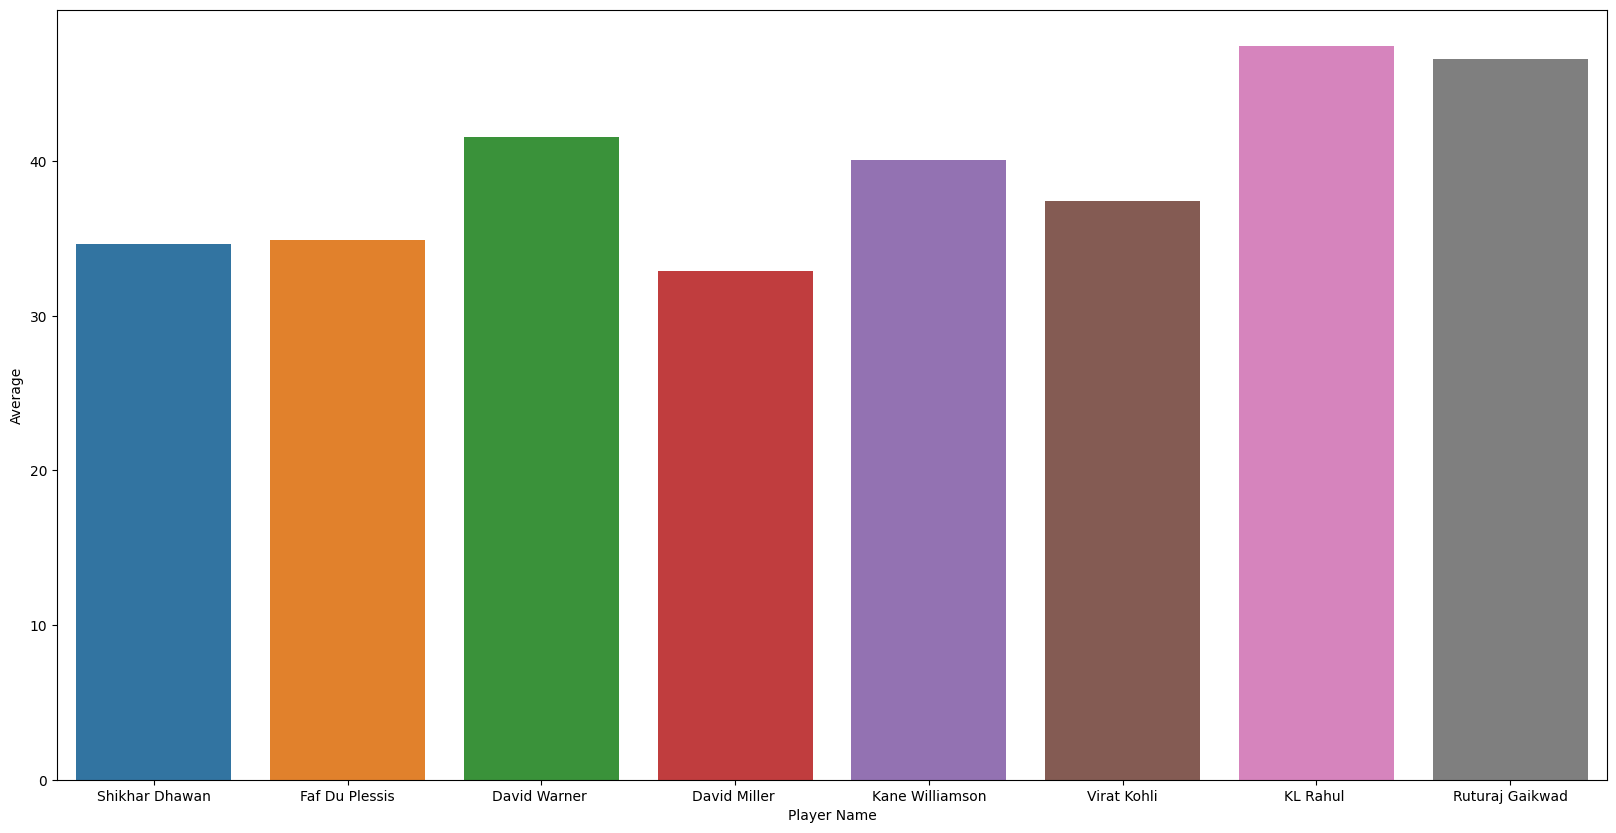

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Average', data=top_batters)

<Axes: xlabel='Player Name', ylabel='Matches_Played'>

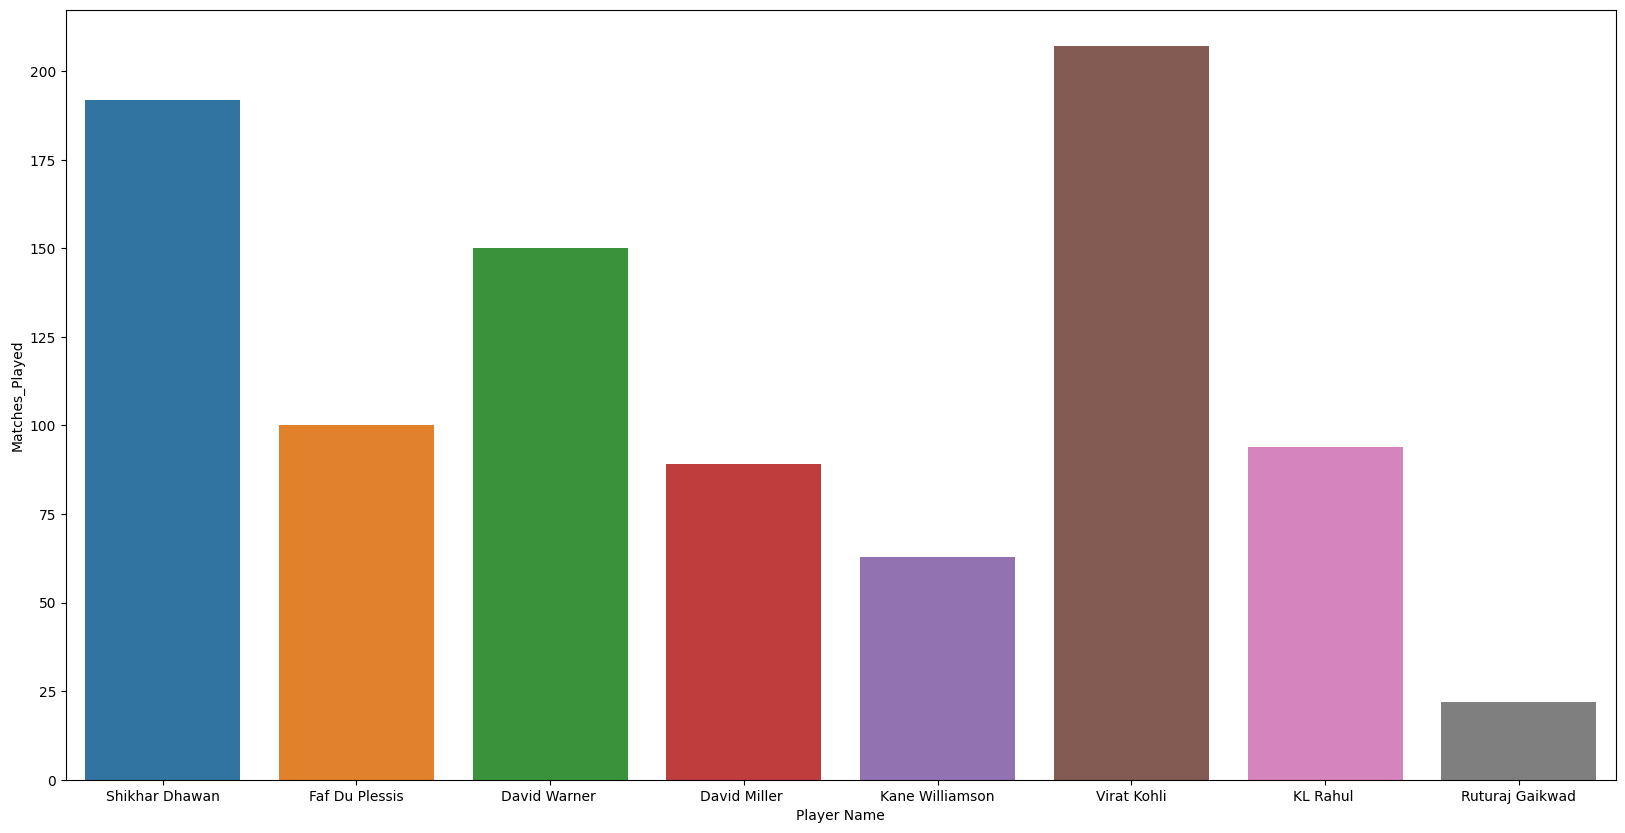

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Matches_Played', data=top_batters)

Bowlers Data

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Bowling_average', data=top_bowlers)

ValueError: ignored

<Figure size 2000x1000 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Economy', data=top_bowlers)

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Bowling_average', data=top_bowlers)

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Bowling_Strike_Rate', data=top_bowlers)

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Wickets', data=top_bowlers)

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Matches_Played', data=top_bowlers)

All Rounders Data

<Axes: xlabel='Player Name', ylabel='Strike_Rate'>

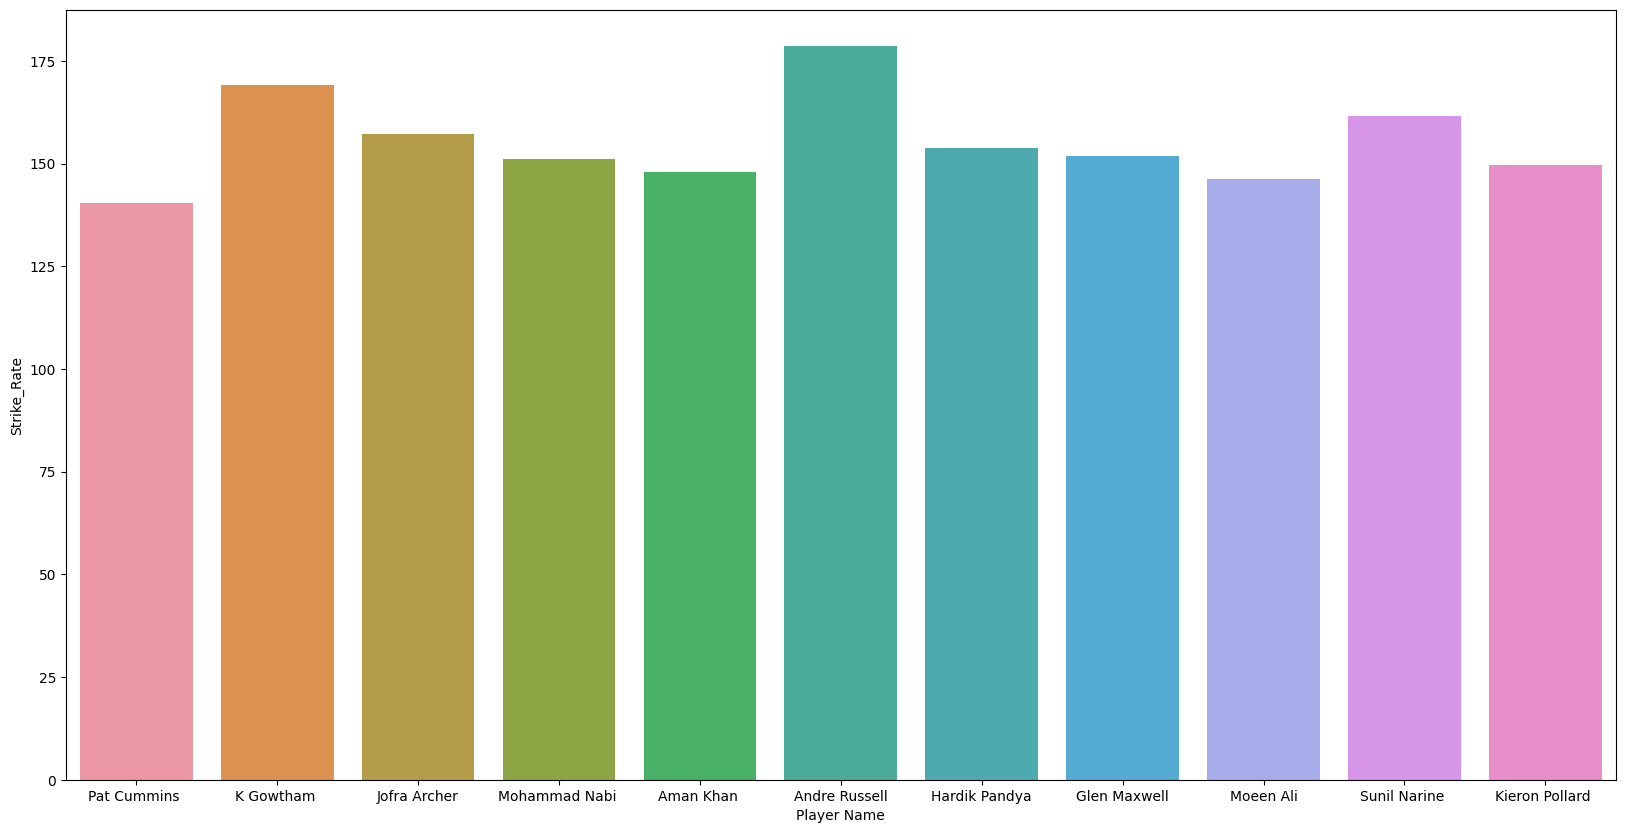

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Strike_Rate', data=top_allrounders)

<Axes: xlabel='Player Name', ylabel='Average'>

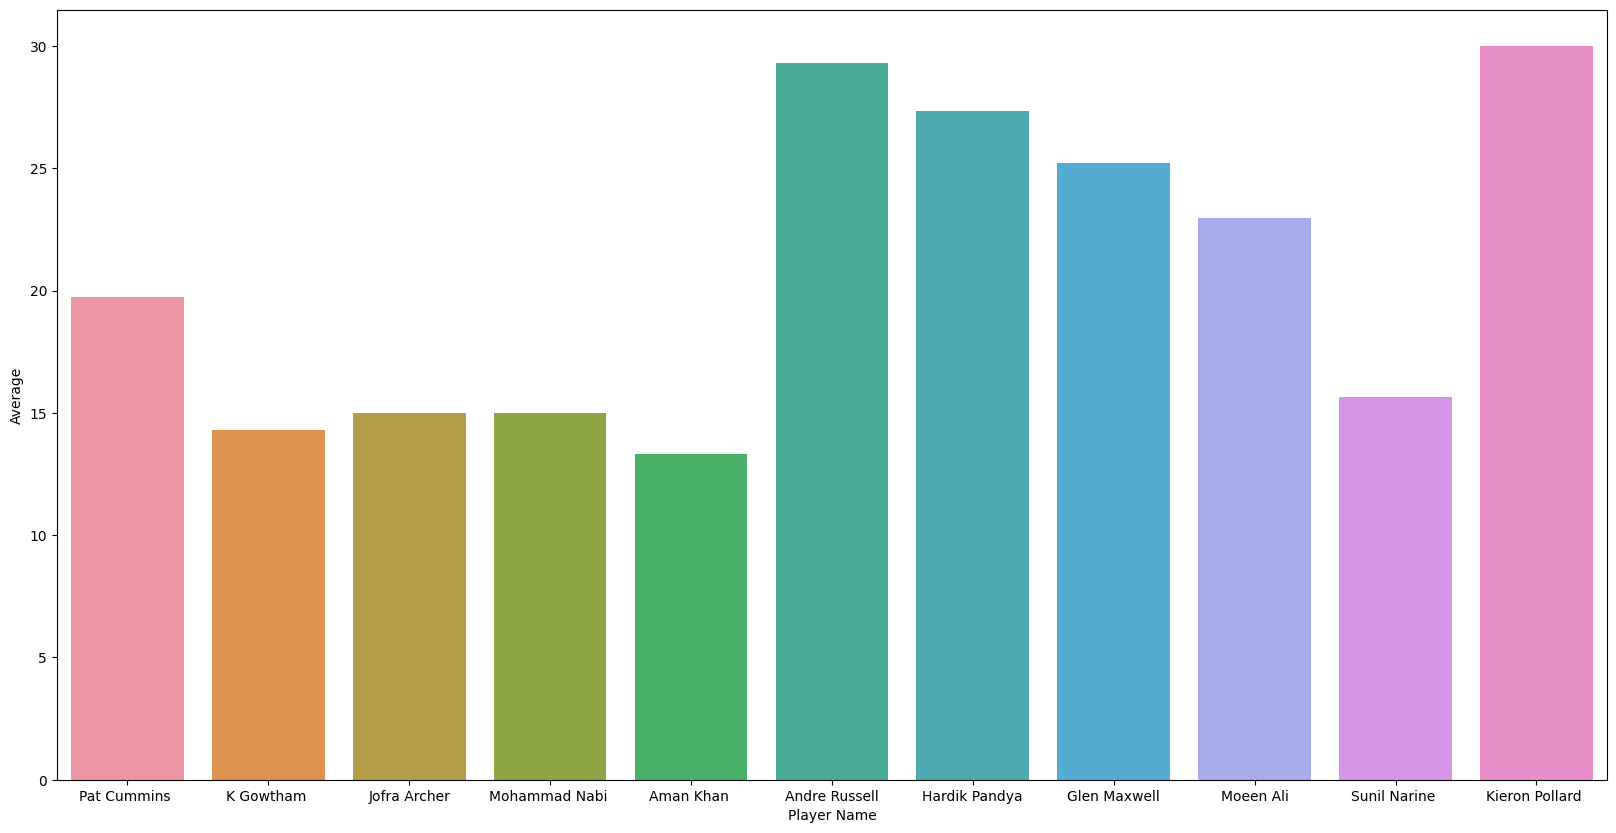

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Average', data=top_allrounders)

<Axes: xlabel='Player Name', ylabel='Matches_Played'>

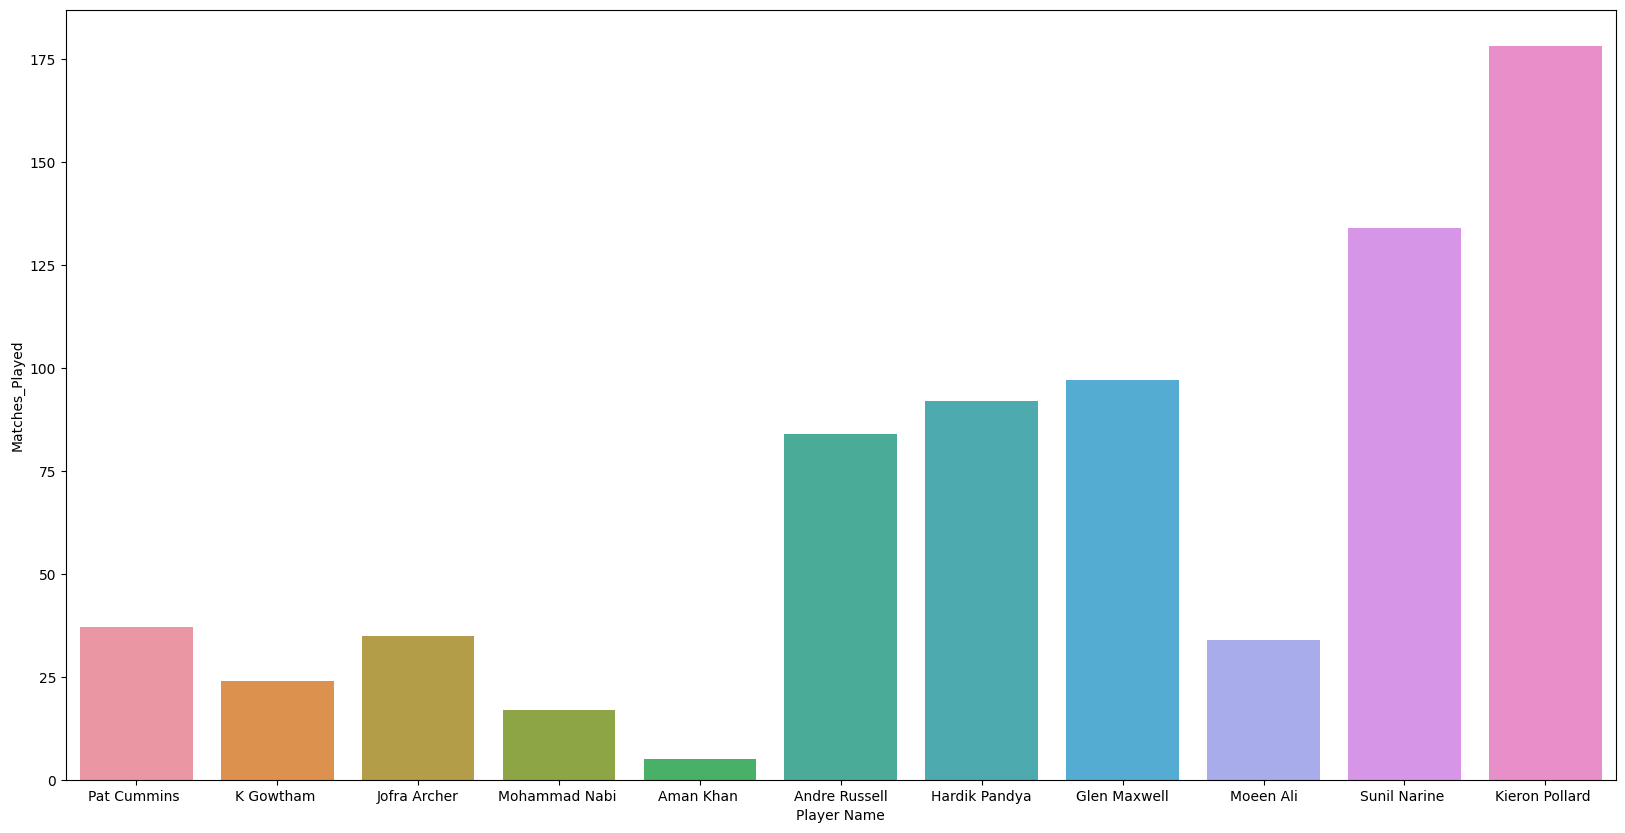

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Matches_Played', data=top_allrounders)

<Axes: xlabel='Player Name', ylabel='Runs'>

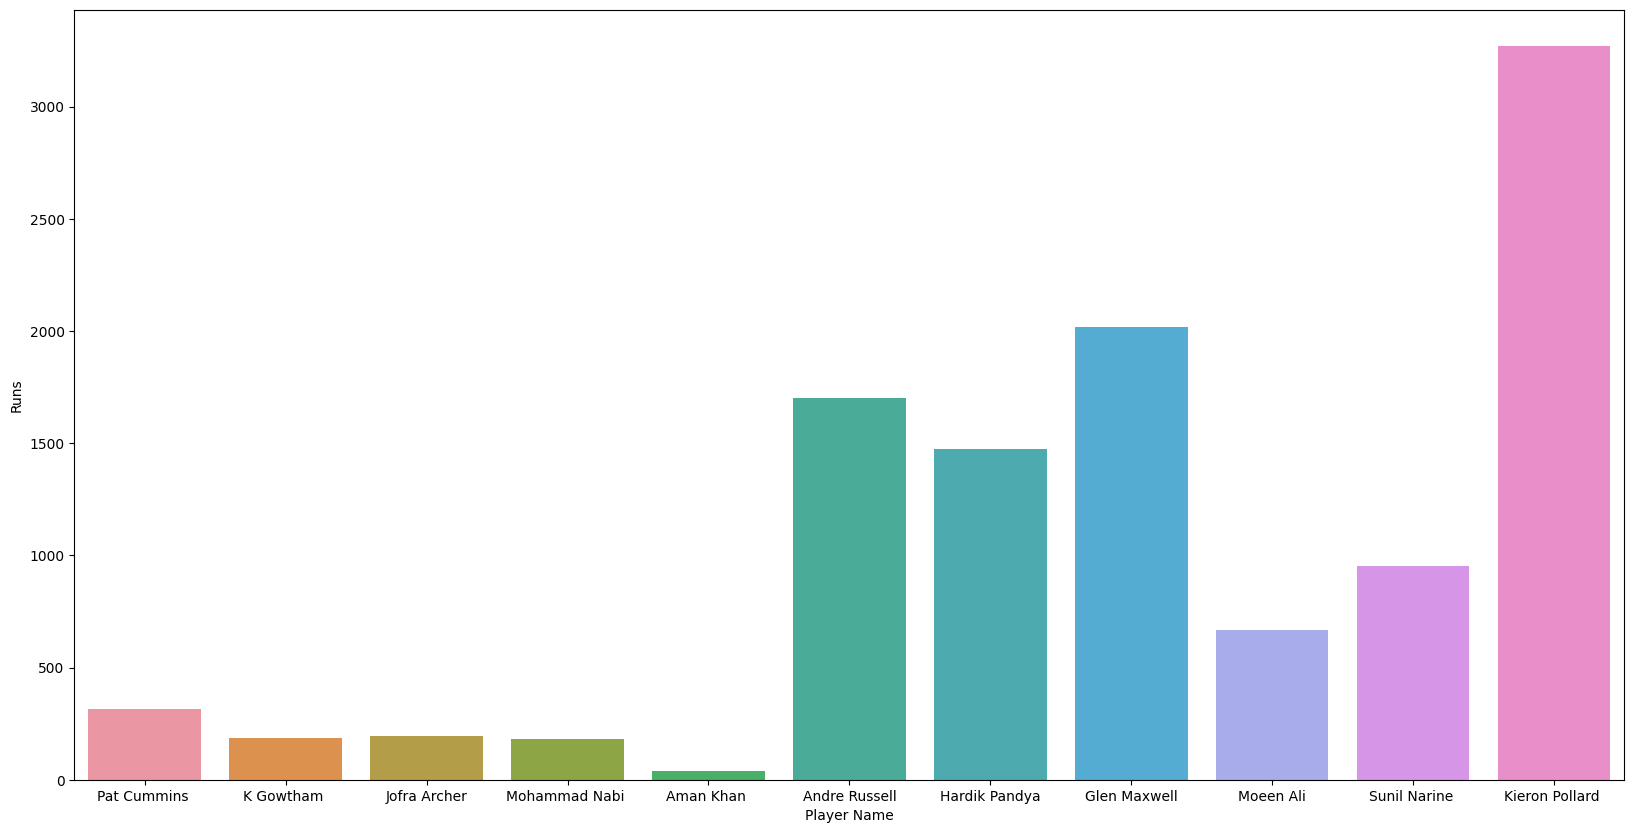

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Runs', data=top_allrounders)

<Axes: xlabel='Player Name', ylabel='Bowling_average'>

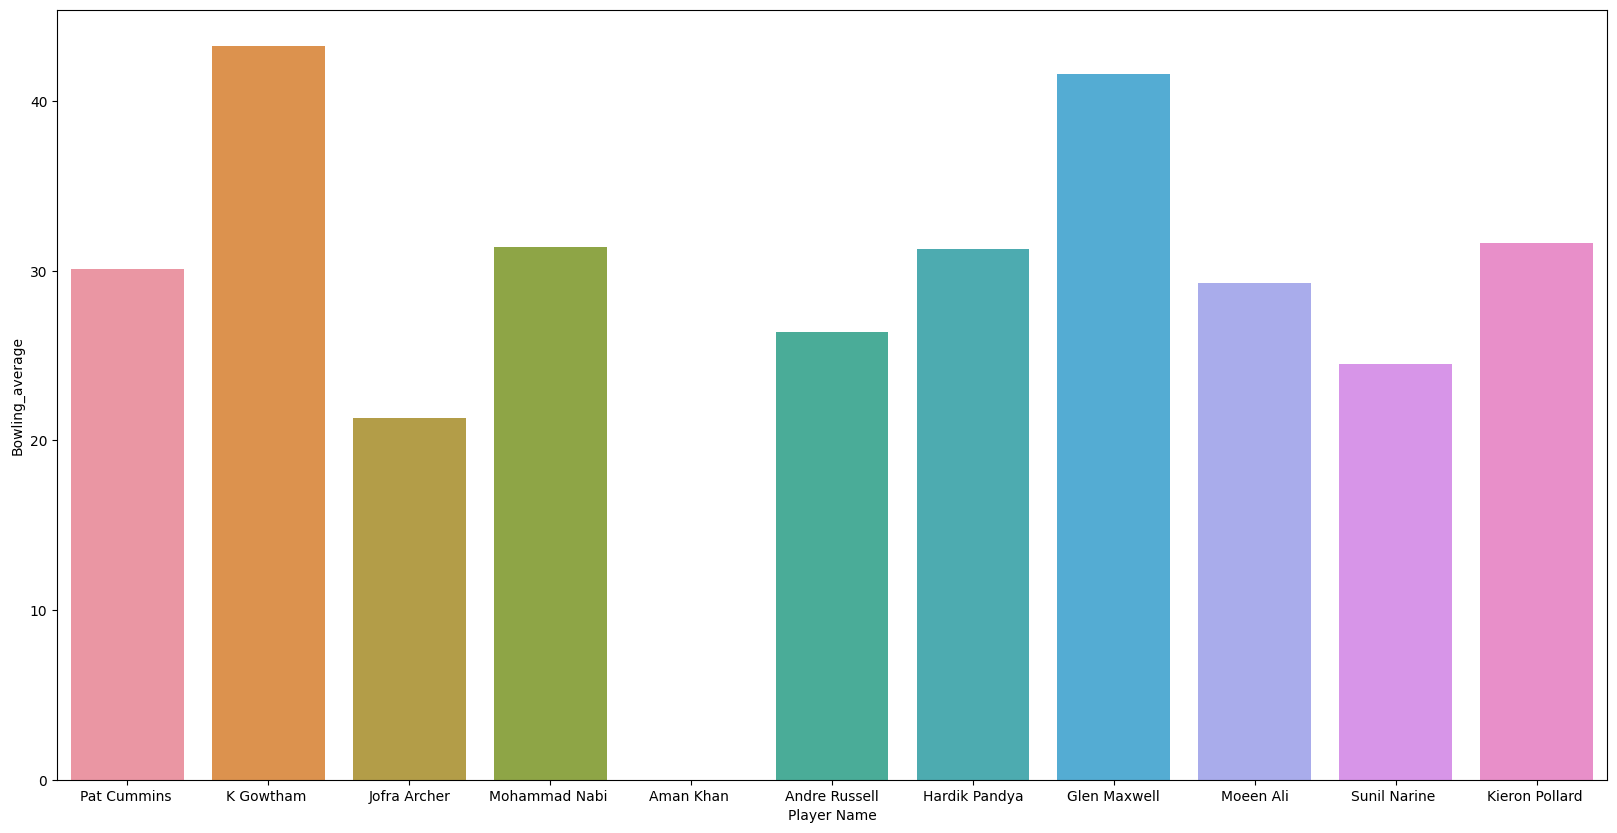

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Bowling_average', data=top_allrounders)

<Axes: xlabel='Player Name', ylabel='Economy'>

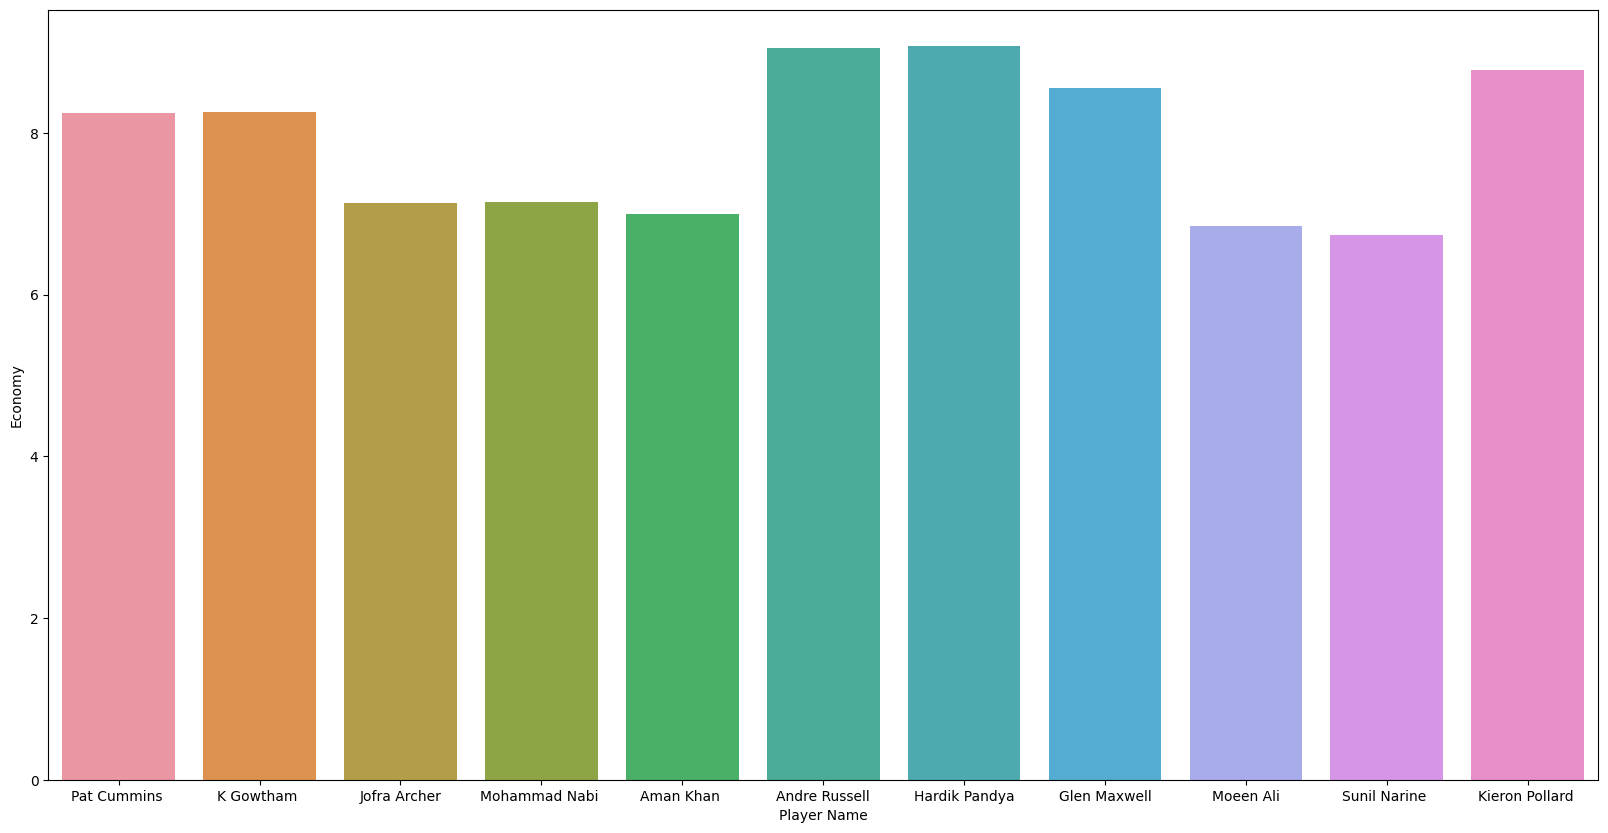

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Economy', data=top_allrounders)

<Axes: xlabel='Player Name', ylabel='Wickets'>

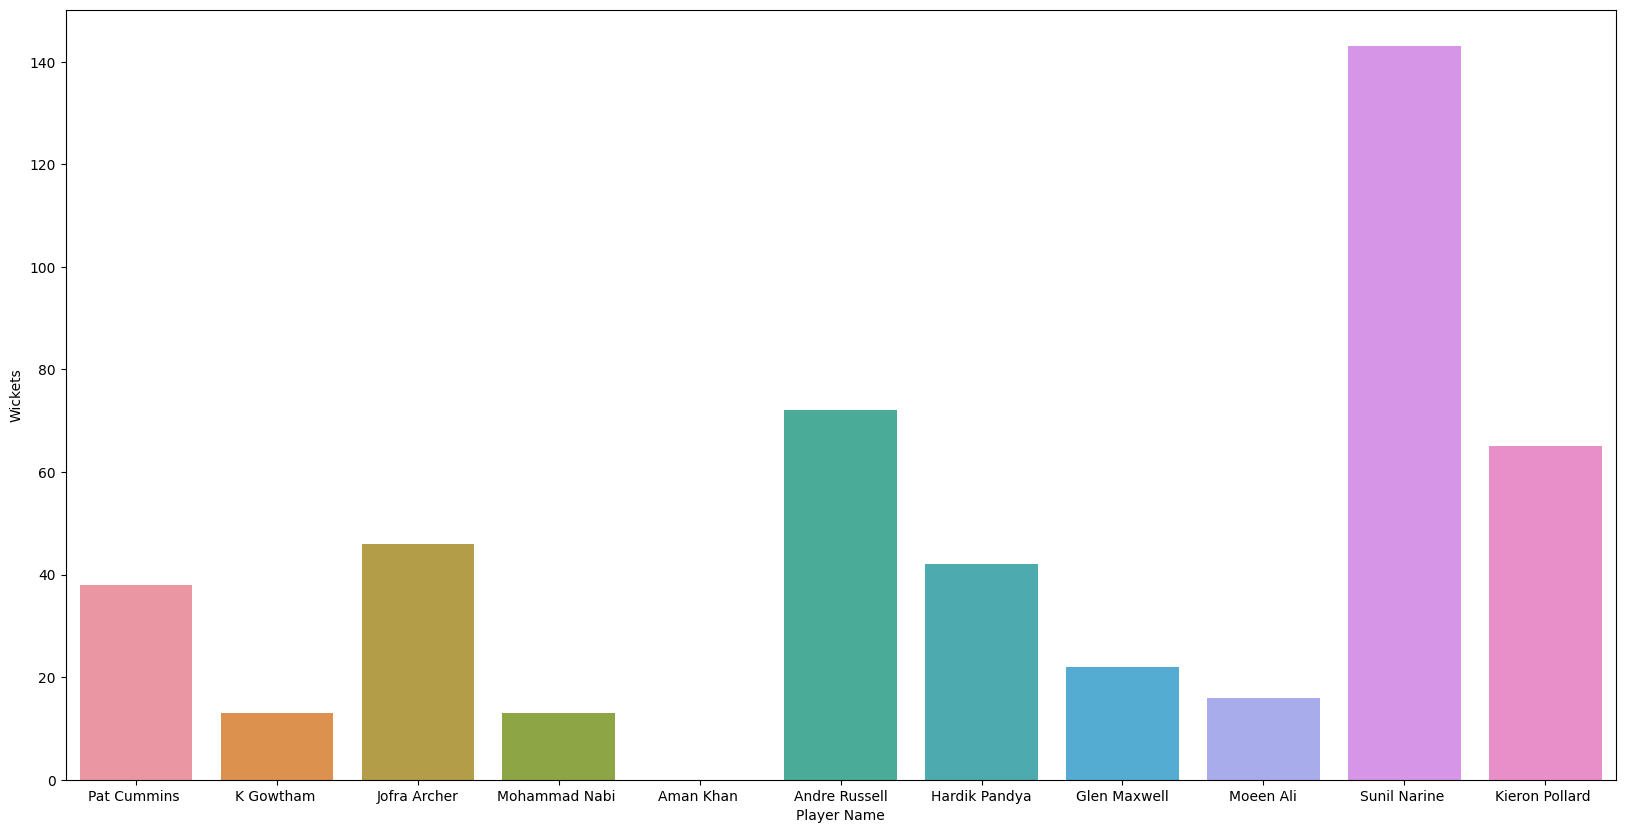

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Wickets', data=top_allrounders)

Keepers data

<Axes: xlabel='Player Name', ylabel='Average'>

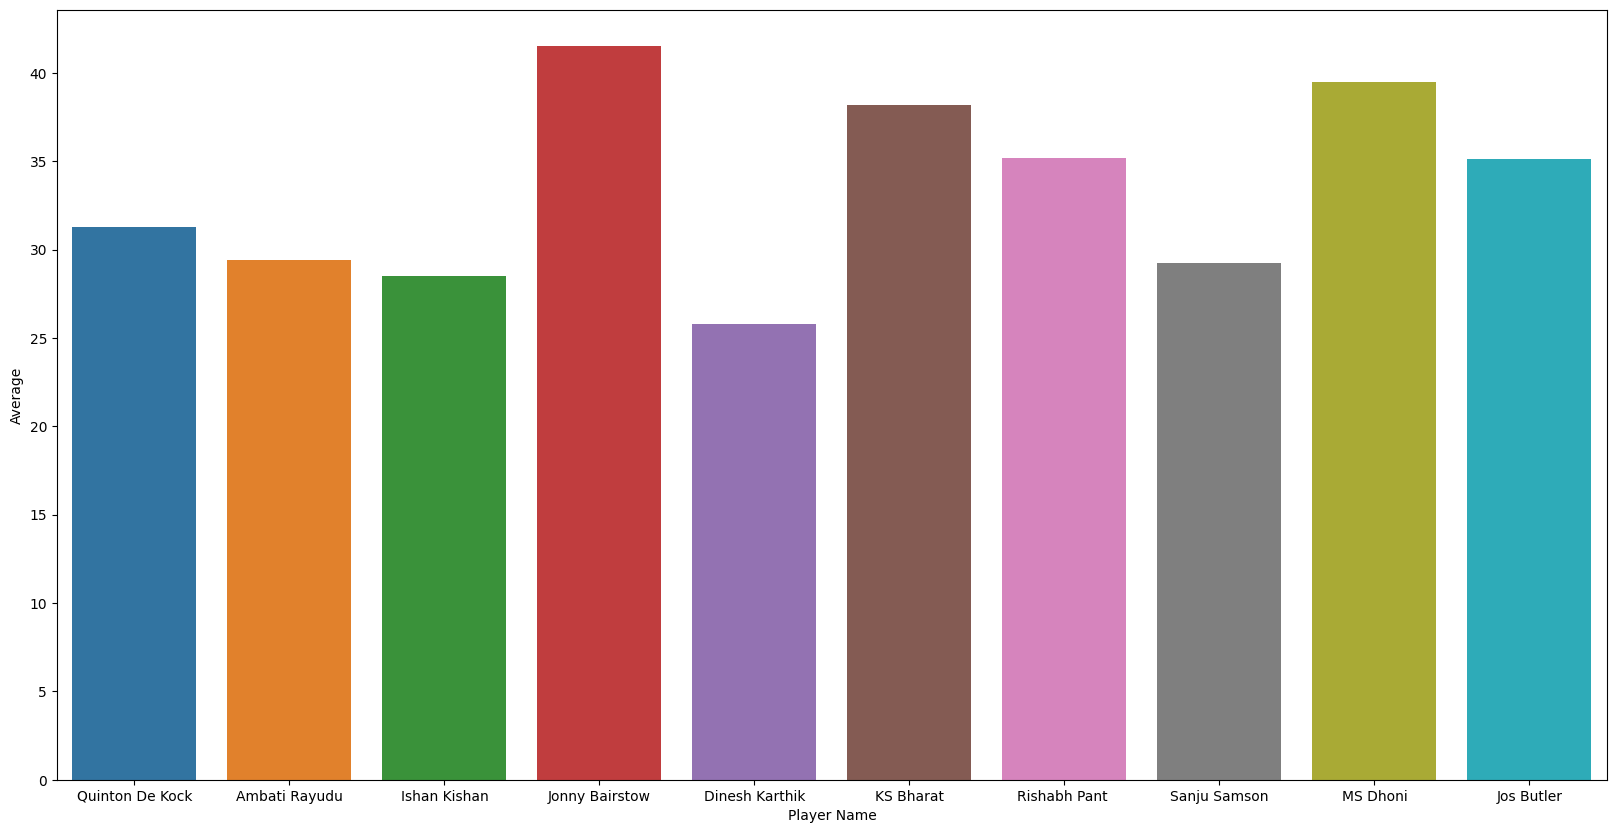

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Average', data=top_keepers)

<Axes: xlabel='Player Name', ylabel='Runs'>

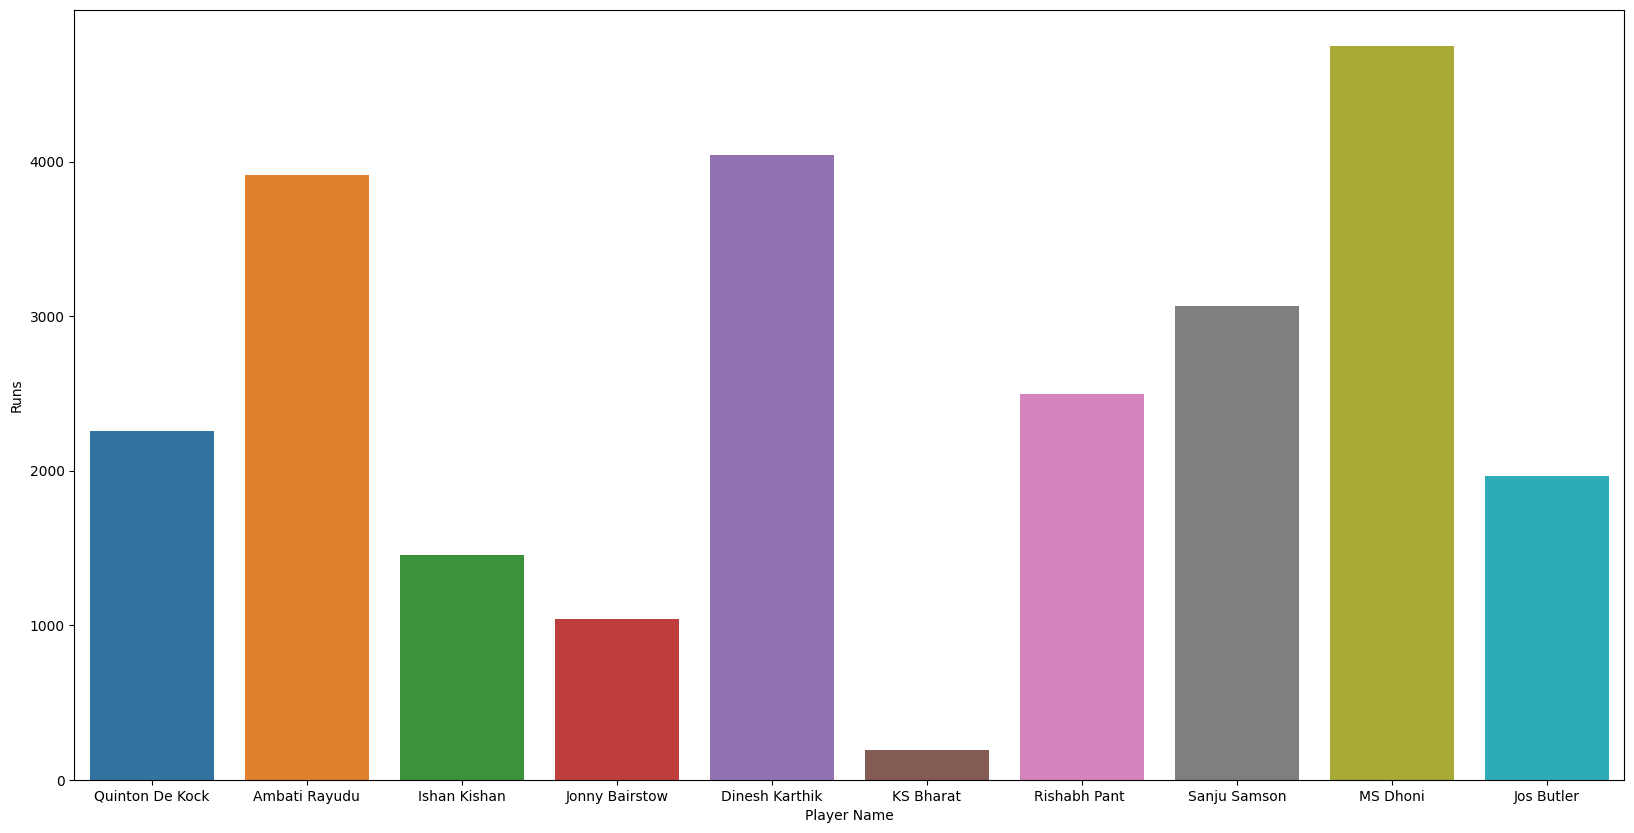

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Runs', data=top_keepers)

<Axes: xlabel='Player Name', ylabel='Strike_Rate'>

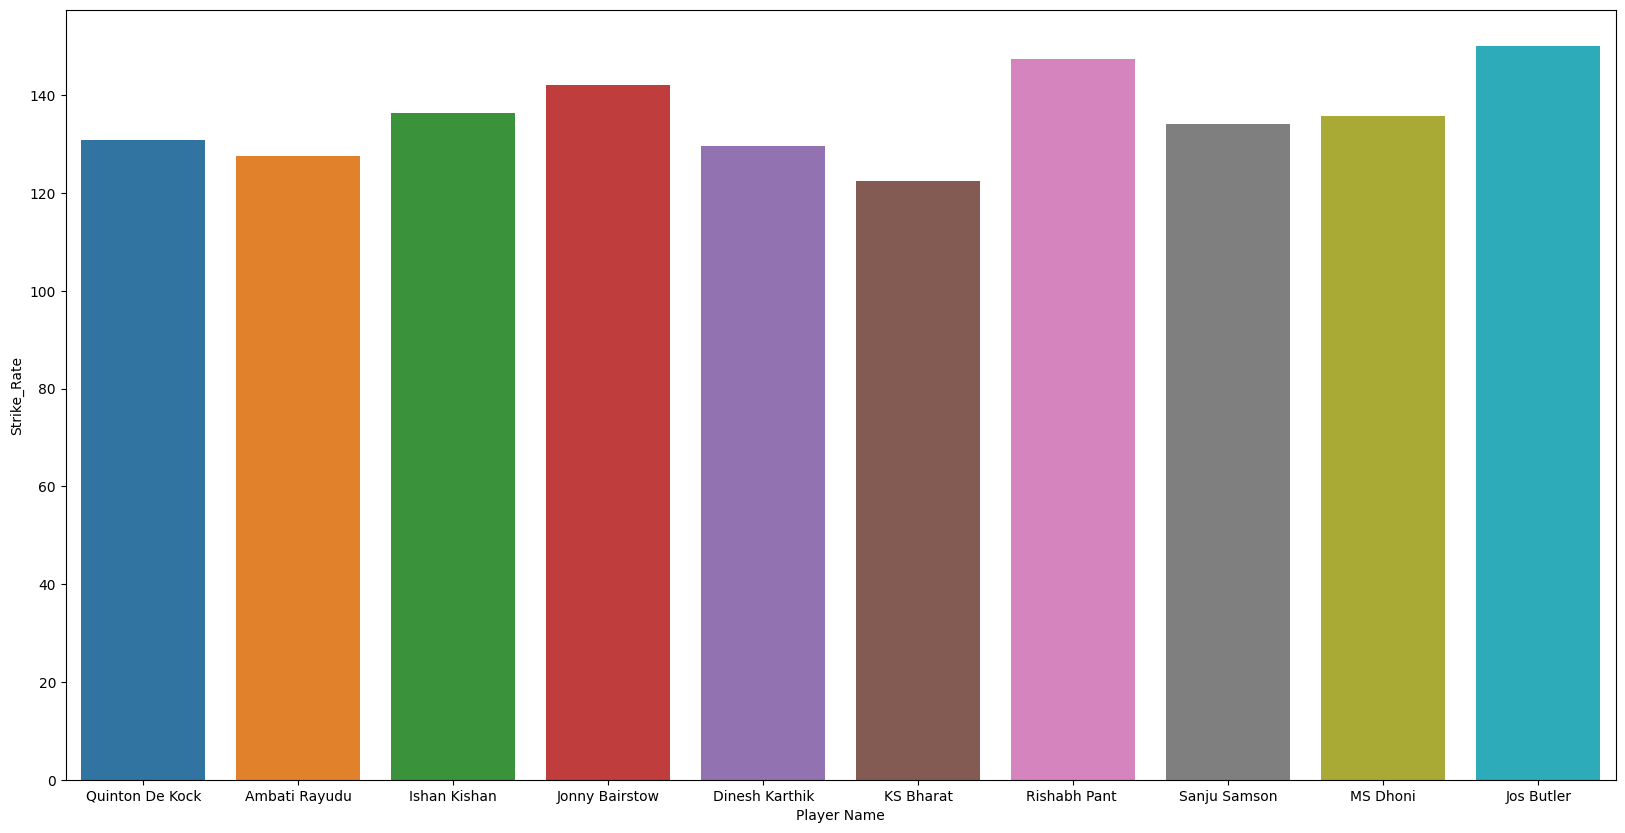

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Strike_Rate', data=top_keepers)

<Axes: xlabel='Player Name', ylabel='Catches'>

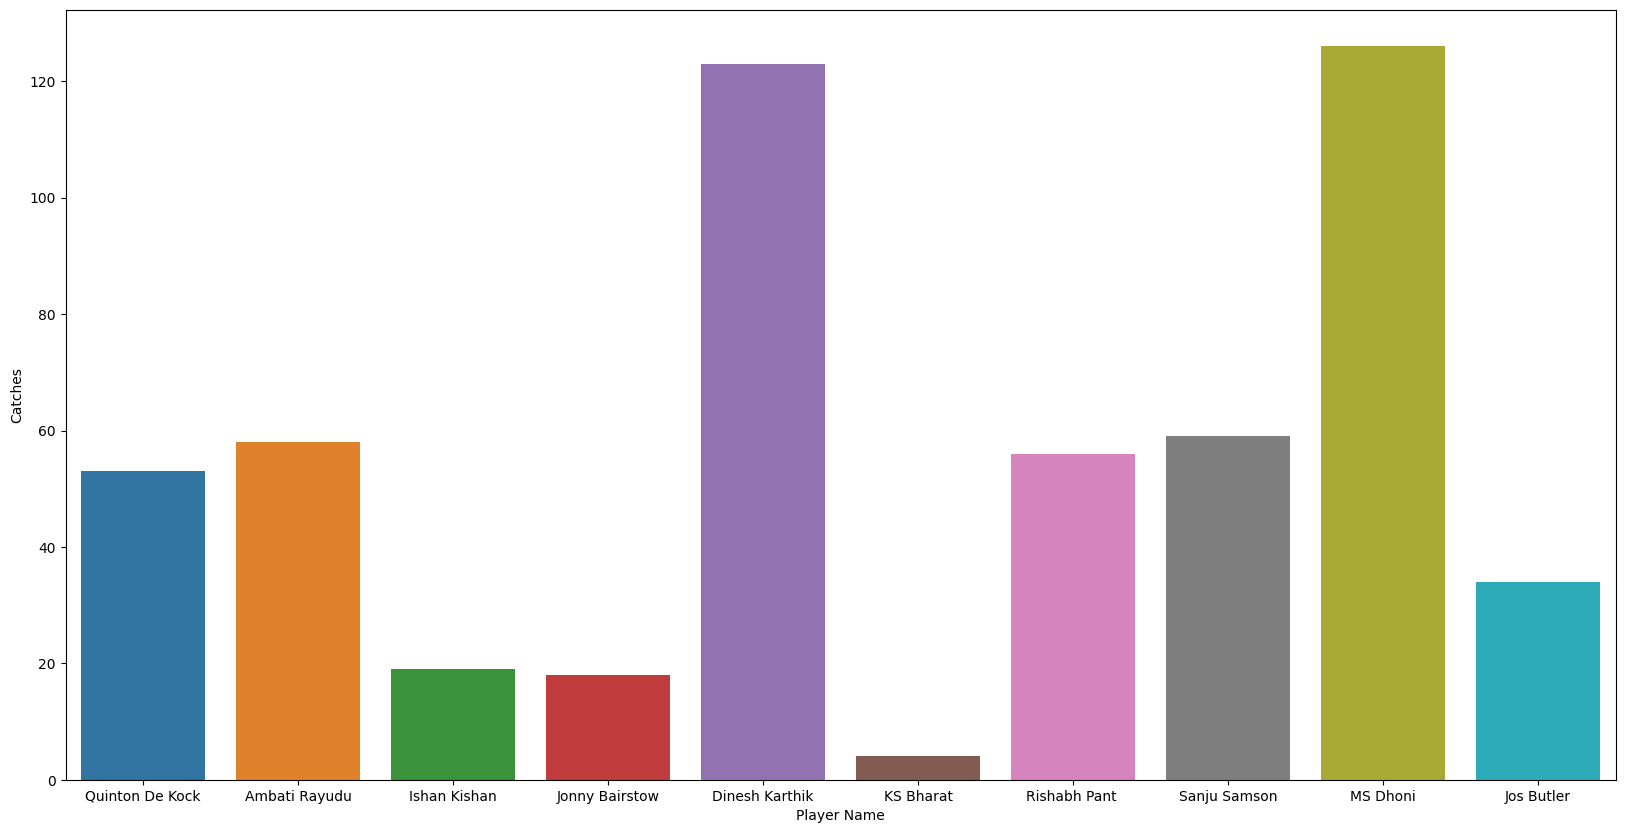

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Catches', data=top_keepers)

<Axes: xlabel='Player Name', ylabel='Run_outs'>

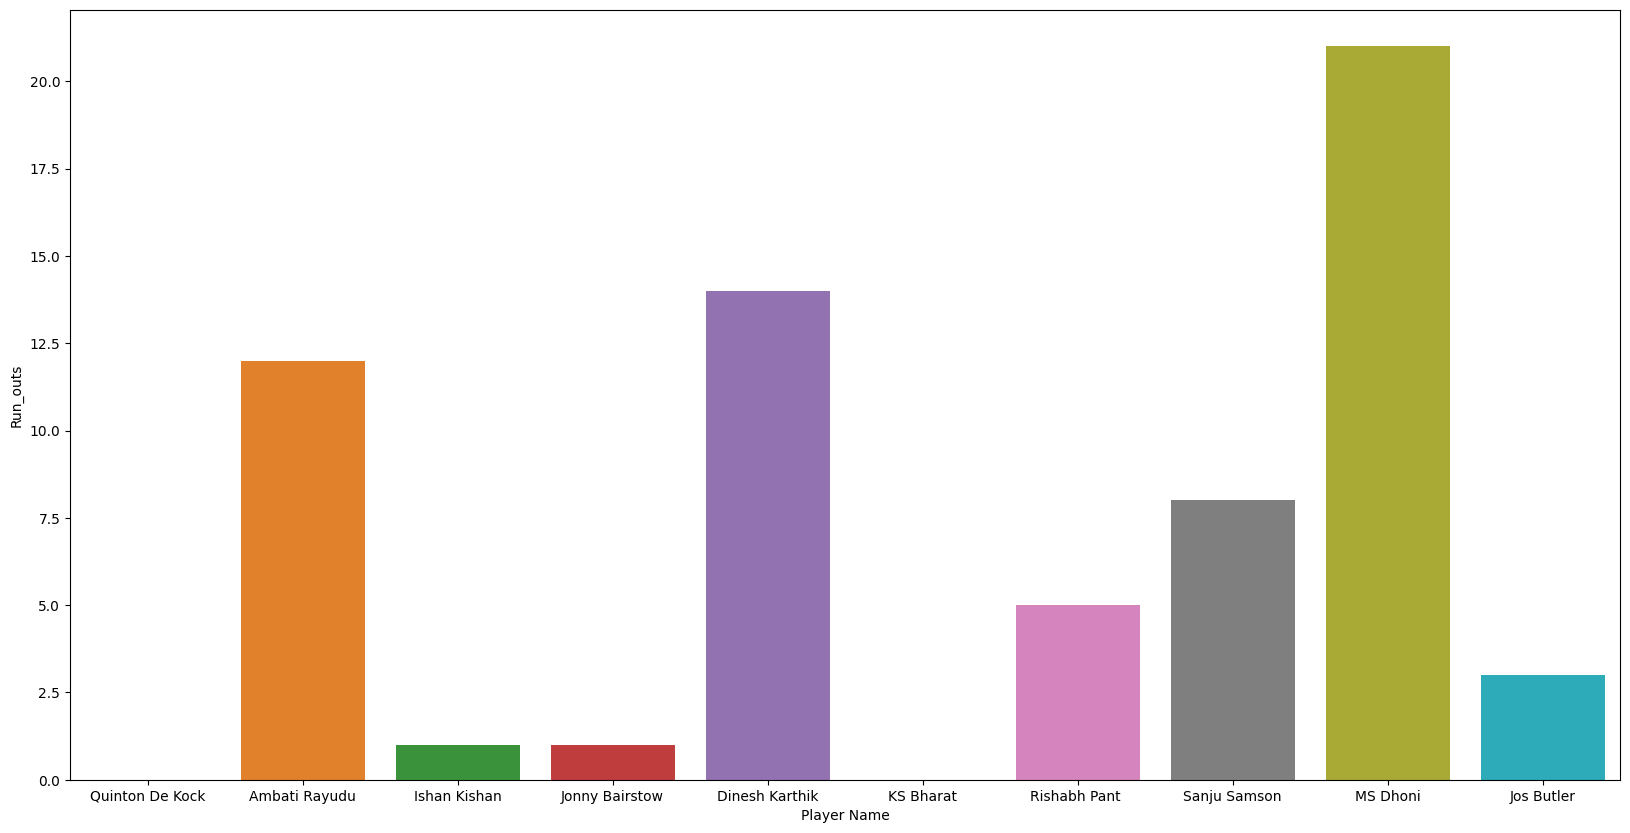

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Run_outs', data=top_keepers)

<Axes: xlabel='Player Name', ylabel='Stumps'>

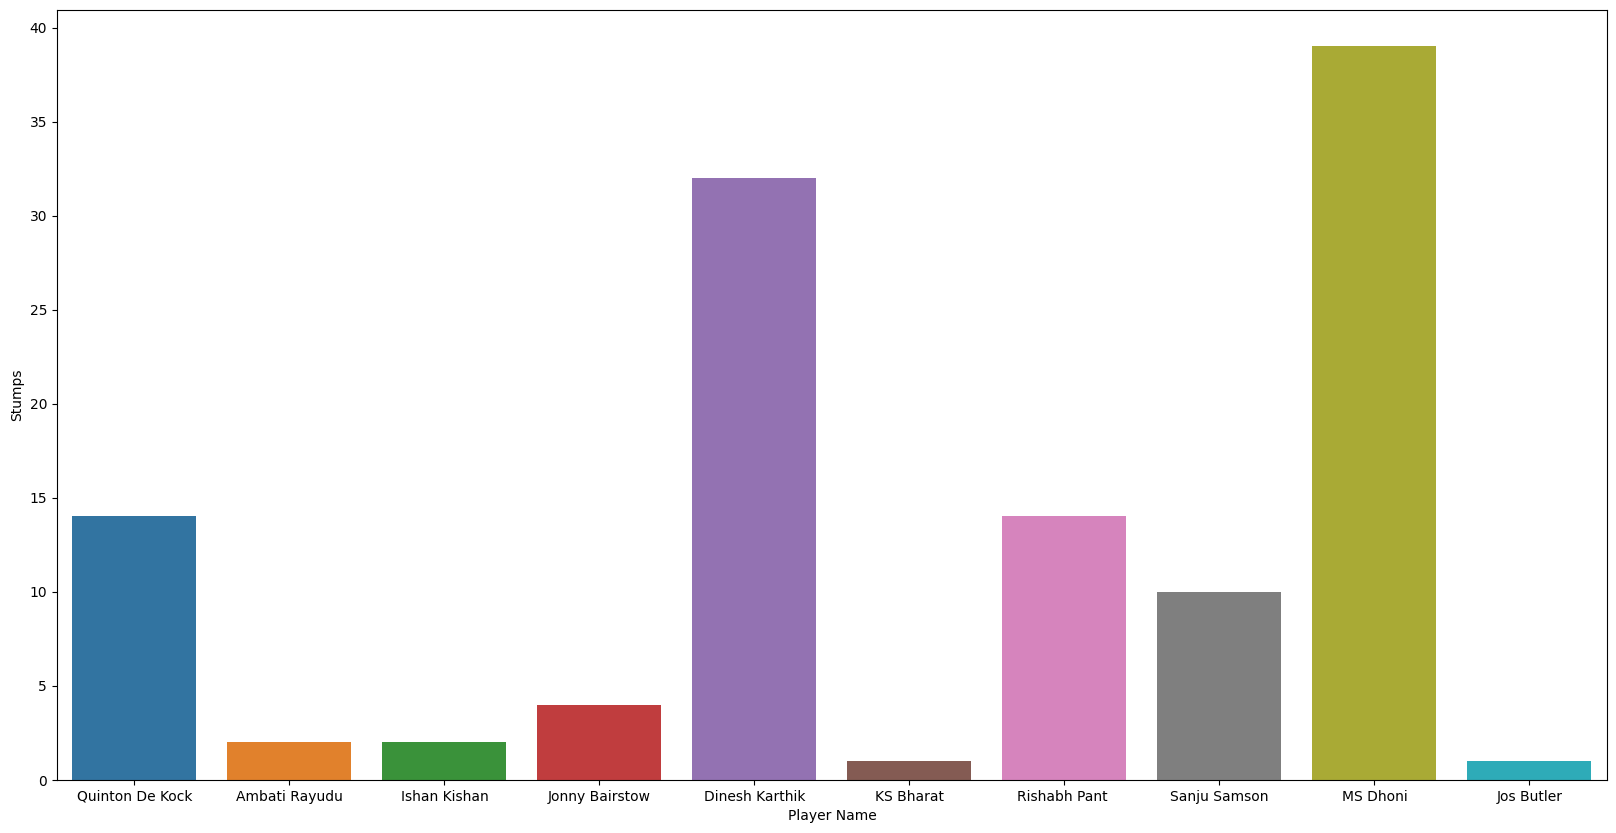

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Player Name', y='Stumps', data=top_keepers)

For final analysis we will consider the ratio of players in the best 11 as follows:

1.   3 batters
2.   3 All rounders
3.   4 Bowlers with 2 Spin Options
4.   1 wicket keeper



<Axes: title={'center': 'Average'}>

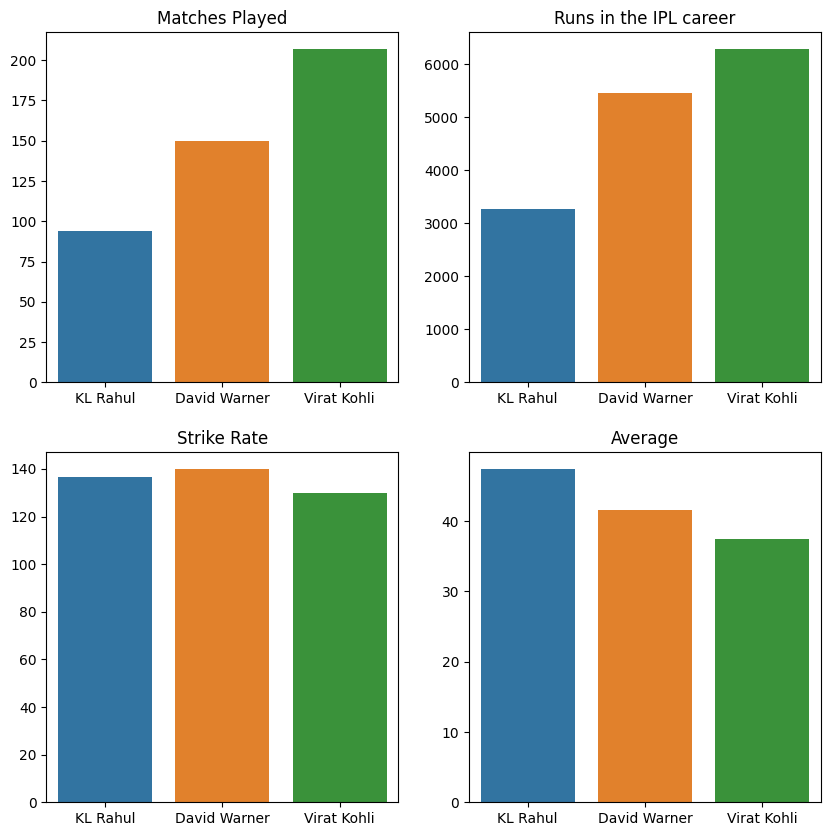

In [ ]:
#Batters for final 11 are- KL Rahul, Virat Kohli, David Warner

top_batters.reset_index(drop=True)
matches_values = [top_batters.iloc[6]['Matches_Played'],top_batters.iloc[2]['Matches_Played'],top_batters.iloc[5]['Matches_Played']]
runs_values = [top_batters.iloc[6]['Runs'],top_batters.iloc[2]['Runs'],top_batters.iloc[5]['Runs']]
average_values = [top_batters.iloc[6]['Average'],top_batters.iloc[2]['Average'],top_batters.iloc[5]['Average']]
strike_rate_values = [top_batters.iloc[6]['Strike_Rate'],top_batters.iloc[2]['Strike_Rate'],top_batters.iloc[5]['Strike_Rate']]
Labels = ['KL Rahul', 'David Warner', 'Virat Kohli']

fig, axes = plt.subplots(2,2, figsize=(10,10))
axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Runs in the IPL career")
axes[1][0].set_title("Strike Rate")
axes[1][1].set_title("Average")
sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=Labels, y=strike_rate_values, ax=axes[1][0])
sns.barplot(x=Labels, y=average_values, ax=axes[1][1])

<Axes: title={'center': 'Economy'}>

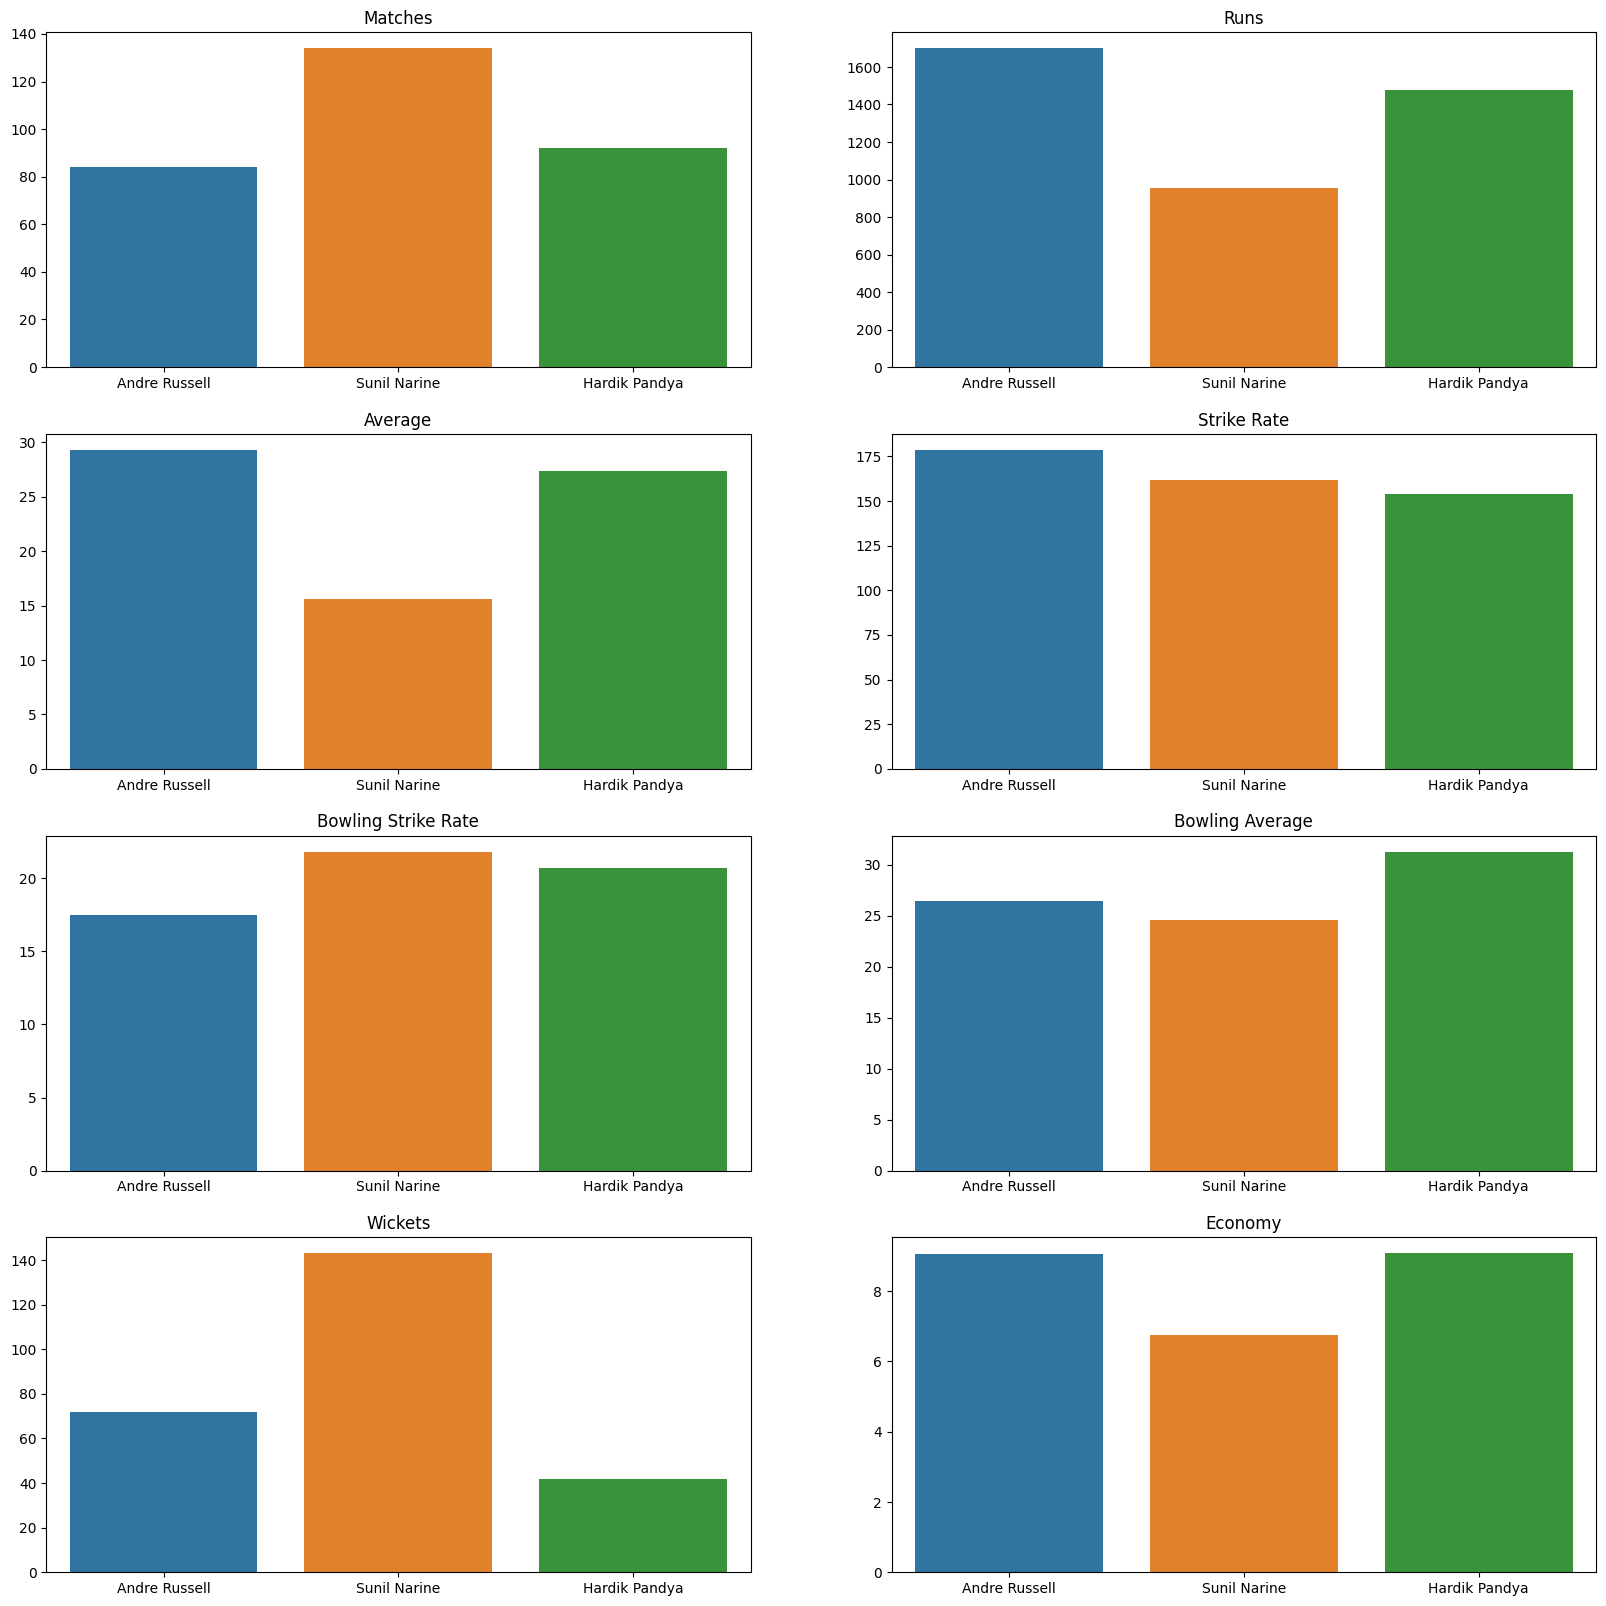

In [ ]:
#All rounders for the final 11 - Andre Russel, Sunil Narine, Hardik Pandya

top_allrounders.reset_index(drop=True)
matches_values = [top_allrounders.iloc[5]['Matches_Played'],top_allrounders.iloc[9]['Matches_Played'],top_allrounders.iloc[6]['Matches_Played']]
runs_values = [top_allrounders.iloc[5]['Runs'],top_allrounders.iloc[9]['Runs'],top_allrounders.iloc[6]['Runs']]
average_values = [top_allrounders.iloc[5]['Average'],top_allrounders.iloc[9]['Average'],top_allrounders.iloc[6]['Average']]
strike_rate_values = [top_allrounders.iloc[5]['Strike_Rate'],top_allrounders.iloc[9]['Strike_Rate'],top_allrounders.iloc[6]['Strike_Rate']]
bowling_strike_rate_values = [top_allrounders.iloc[5]['Bowling_Strike_Rate'],top_allrounders.iloc[9]['Bowling_Strike_Rate'],top_allrounders.iloc[6]['Bowling_Strike_Rate']]
bowling_average_values = [top_allrounders.iloc[5]['Bowling_average'],top_allrounders.iloc[9]['Bowling_average'],top_allrounders.iloc[6]['Bowling_average']]
wickets_values = [top_allrounders.iloc[5]['Wickets'],top_allrounders.iloc[9]['Wickets'],top_allrounders.iloc[6]['Wickets']]
economy_values = [top_allrounders.iloc[5]['Economy'],top_allrounders.iloc[9]['Economy'],top_allrounders.iloc[6]['Economy']]

Labels = ['Andre Russell', 'Sunil Narine', 'Hardik Pandya']

fig, axes = plt.subplots(4,2, figsize=(20,20))
axes[0][0].set_title("Matches")
axes[0][1].set_title("Runs")
axes[1][0].set_title("Average")
axes[1][1].set_title("Strike Rate")
axes[2][0].set_title("Bowling Strike Rate")
axes[2][1].set_title("Bowling Average")
axes[3][0].set_title("Wickets")
axes[3][1].set_title("Economy")

sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=Labels, y=average_values, ax=axes[1][0])
sns.barplot(x=Labels, y=strike_rate_values, ax=axes[1][1])
sns.barplot(x=Labels, y=bowling_strike_rate_values, ax=axes[2][0])
sns.barplot(x=Labels, y=bowling_average_values, ax=axes[2][1])
sns.barplot(x=Labels, y=wickets_values, ax=axes[3][0])
sns.barplot(x=Labels, y=economy_values, ax=axes[3][1])

In [ ]:
#Bowlers for the final 11 - Jasprit Bumrah, Kagiso Rabada, Nathan Coluter-Nile, Yuzi Chahal

top_bowlers.reset_index(drop=True)
matches_values = [top_bowlers.iloc[10]['Matches_Played'],top_bowlers.iloc[0]['Matches_Played'],top_bowlers.iloc[7]['Matches_played'], top_bowlers.iloc[1]['Matches_Played']]
Wickets_values = [top_bowlers.iloc[10]['Wickets'],top_bowlers.iloc[0]['Wickets'],top_bowlers.iloc[7]['Wickets'], top_bowlers.iloc[1]['Wickets']]
bowling_average_values = [top_bowlers.iloc[10]['Bowling_Average'],top_bowlers.iloc[0]['Bowling_Average'],top_bowlers.iloc[7]['Bowling_Average'], top_bowlers.iloc[1]['Bowling_Average']]
bowling_Sstrike_rate_values = [top_bowlers.iloc[10]['Bowling_Strike_Rate'],top_bowlers.iloc[0]['Bowling_Strike_Rate'],top_bowlers.iloc[7]['Bowling_Strike_Rate'], top_bowlers.iloc[1]['Bowling_Strike_Rate']]
economy_values = [top_bowlers.iloc[10]['Economy'],top_bowlers.iloc[0]['Economy'],top_bowlers.iloc[7]['Economy'], top_bowlers.iloc[1]['Economy']]

Labels = ['Jasprit Bumrah', 'Kagiso Rabada', 'Nathan Coulter-Nile', 'Yuzi Chahal']

fig, axes = plt.subplots(3,2, figsize=(15,15))
axes[0][0].set_title("Matches_Played")
axes[0][1].set_title("Wickets")
axes[1][0].set_title("Bowling Average")
axes[1][1].set_title("Bowling Strike Rate")
axes[2][0].set_title("Economy")

sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=wickets_values, ax=axes[0][1])
sns.barplot(x=Labels, y=bowling_average_values, ax=axes[1][0])
sns.barplot(x=Labels, y=bowling_strike_rate_values, ax=axes[1][1])
sns.barplot(x=Labels, y=economy_values, ax=axes[2][0])



<Axes: title={'center': 'Keeping Stats'}>

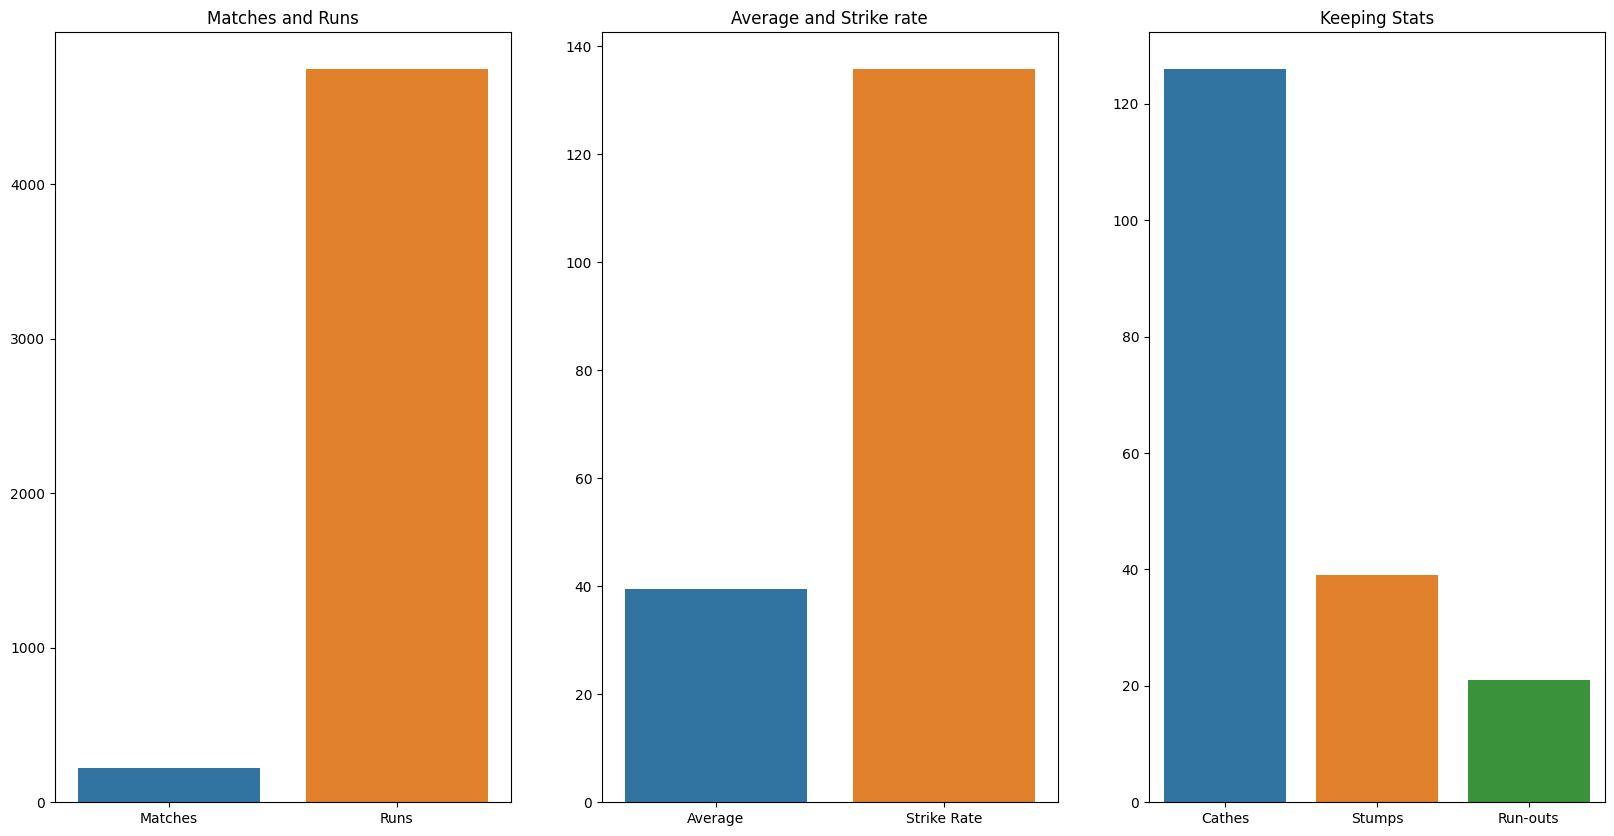

In [ ]:
#wicket Keeper for the Final 11 - MS Dhoni

matches_values = [top_keepers.iloc[8]['Matches_Played'], top_keepers.iloc[8]['Runs']]
average_values = [top_keepers.iloc[8]['Average'], top_keepers.iloc[8]['Strike_Rate']]
keeping_values = [top_keepers.iloc[8]['Catches'], top_keepers.iloc[8]['Stumps'],top_keepers.iloc[8]['Run_outs']]

label1 = ['Matches', 'Runs']
label2 = ['Average', 'Strike Rate']
label3 = ['Cathes', 'Stumps', 'Run-outs']

fig,axes = plt.subplots(1,3, figsize=(20,10))
axes[0].set_title("Matches and Runs")
axes[1].set_title("Average and Strike rate")
axes[2].set_title("Keeping Stats")

sns.barplot(x=label1, y=matches_values, ax=axes[0])
sns.barplot(x=label2, y=average_values, ax=axes[1])
sns.barplot(x=label3, y=keeping_values, ax=axes[2])

In [ ]:
batter1 = top_batters.loc[(top_batters["Player Name"] == 'KL Rahul')]
batter2 = top_batters.loc[(top_batters["Player Name"] == 'David Warner')]
batter3 = top_batters.loc[(top_batters["Player Name"] == 'Virat Kohli')]

bowler1 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Yuzvendra Chahal')]
bowler2 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Jasprit Bumrah')]
bowler3 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Nathan Coulter-Nile')]
bowler4 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Kagiso Rabada')]

allrounder1 = top_allrounders.loc[(top_allrounders["Player Name"] == 'Andre Russell')]
allrounder2 = top_allrounders.loc[(top_allrounders["Player Name"] == 'Sunil Narine')]
allrounder3 = top_allrounders.loc[(top_allrounders["Player Name"] == 'Hardik Pandya')]

keeper = top_keepers.loc[(top_keepers["Player Name"] == 'MS Dhoni')]

final = [batter1, batter2, batter3, allrounder1, allrounder2, allrounder3, keeper, bowler1, bowler2, bowler3, bowler4]
final_team = pd.concat(final)
final_team = final_team.drop(labels=['Matches_Played', 'Runs', 'Average', 'Strike_Rate', 'Wickets',
                                     'Bowling_average', 'Economy', 'Bowling_Strike_Rate',
                                     'Catches', 'Run_outs', 'Stumps'], axis=1)
final_team.reset_index(drop=True)